In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
# Učitavanje originalne datoteke podataka
df = pd.read_csv('/Users/tina/Documents/LUMEN/lumen_dataset/data/lumen/data_2017.csv')
df['broj_djece_gostiju']= df['broj_djece_gostiju'].astype('int64')
df['datum_dolaska'] = pd.to_datetime(df['datum_dolaska'])
df['datum_kreiranja_rezervacije'] = pd.to_datetime(df['datum_kreiranja_rezervacije'])
df['datum_otkazivanja_rezervacije'] = pd.to_datetime(df['datum_otkazivanja_rezervacije'])
df.head()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,ukupan_broj_gostiju
0,0,2017-01-01,2016-12-11,2017-01-02,2016-10-20,2,0,PRT,2,1,65.121486,Canceled,1322991,1025624,2
1,0,2017-01-01,2016-11-08,2017-01-05,2016-12-04,2,0,AUT,2,1,74.507793,Canceled,1322992,1004001,2
2,0,2017-01-01,2016-10-01,2017-01-05,2016-11-11,2,0,AUT,2,1,58.913925,Canceled,1322993,1010854,2
3,0,2017-01-01,2016-12-31,2017-01-05,2016-12-04,2,0,AUT,2,1,61.473757,Canceled,1322994,1047238,2
4,0,2017-01-01,2016-12-11,2017-01-05,2016-10-29,1,0,PRT,2,1,51.573985,Canceled,1322995,1023679,1


In [3]:
df.describe()

,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,rezervacija_id,gost_id,ukupan_broj_gostiju
count,40620.000000,40620,40620,15734,40620.000000,40620.000000,40620.000000,40620.000000,40620.000000,4.062000e+04,4.062000e+04,40620.000000
mean,0.675677,2017-06-10 01:25:34.652880384,2017-03-03 06:17:05.228951296,2017-02-07 00:27:49.352993536,1.881093,0.132964,1.708641,1.538725,134.050752,1.384752e+06,1.053870e+06,2.014057
min,0.000000,2017-01-01 00:00:00,2015-01-09 00:00:00,2015-10-21 00:00:00,0.000000,0.000000,0.000000,0.000000,40.007639,1.322991e+06,1.000000e+06,1.000000
25%,0.000000,2017-03-08 00:00:00,2016-12-20 00:00:00,2016-12-15 00:00:00,2.000000,0.000000,2.000000,1.000000,86.574297,1.350251e+06,1.027011e+06,2.000000
50%,1.000000,2017-06-11 00:00:00,2017-02-18 00:00:00,2017-02-06 00:00:00,2.000000,0.000000,2.000000,1.000000,116.921196,1.382386e+06,1.054262e+06,2.000000
75%,1.000000,2017-08-12 00:00:00,2017-05-29 00:00:00,2017-04-20 00:00:00,2.000000,0.000000,2.000000,2.000000,162.178694,1.422277e+06,1.080501e+06,2.000000
max,1.000000,2017-12-31 00:00:00,2017-12-31 00:00:00,2017-08-31 00:00:00,4.000000,3.000000,4.000000,8.000000,765.832355,1.432432e+06,1.107284e+06,5.000000
std,0.468127,NaN,NaN,NaN,0.490679,0.446085,0.684233,1.080138,69.730177,3.595981e+04,3.099760e+04,0.676565


In [4]:
# Adding a new column for the total number of guests
df['ukupan_broj_gostiju'] = df['broj_odraslih_gostiju'] + df['broj_djece_gostiju']

# Saving the updated dataframe back to a CSV file
df.to_csv('/Users/tina/Documents/LUMEN/lumen_dataset/data/lumen/data_2017.csv', index=False)

In [5]:
dnevni_pregled = df.groupby(df['datum_dolaska'].dt.date).agg(
    ukupan_broj_gostiju=pd.NamedAgg(column='ukupan_broj_gostiju', aggfunc='sum'),
    broj_djece_gostiju=pd.NamedAgg(column='broj_djece_gostiju', aggfunc='sum'),
    broj_odraslih_gostiju=pd.NamedAgg(column='broj_odraslih_gostiju', aggfunc='sum')
).reset_index()

dnevni_pregled.to_csv('/Users/tina/Documents/LUMEN/lumen_dataset/data/lumen/pregled_po_danima_2017.csv', index=False)

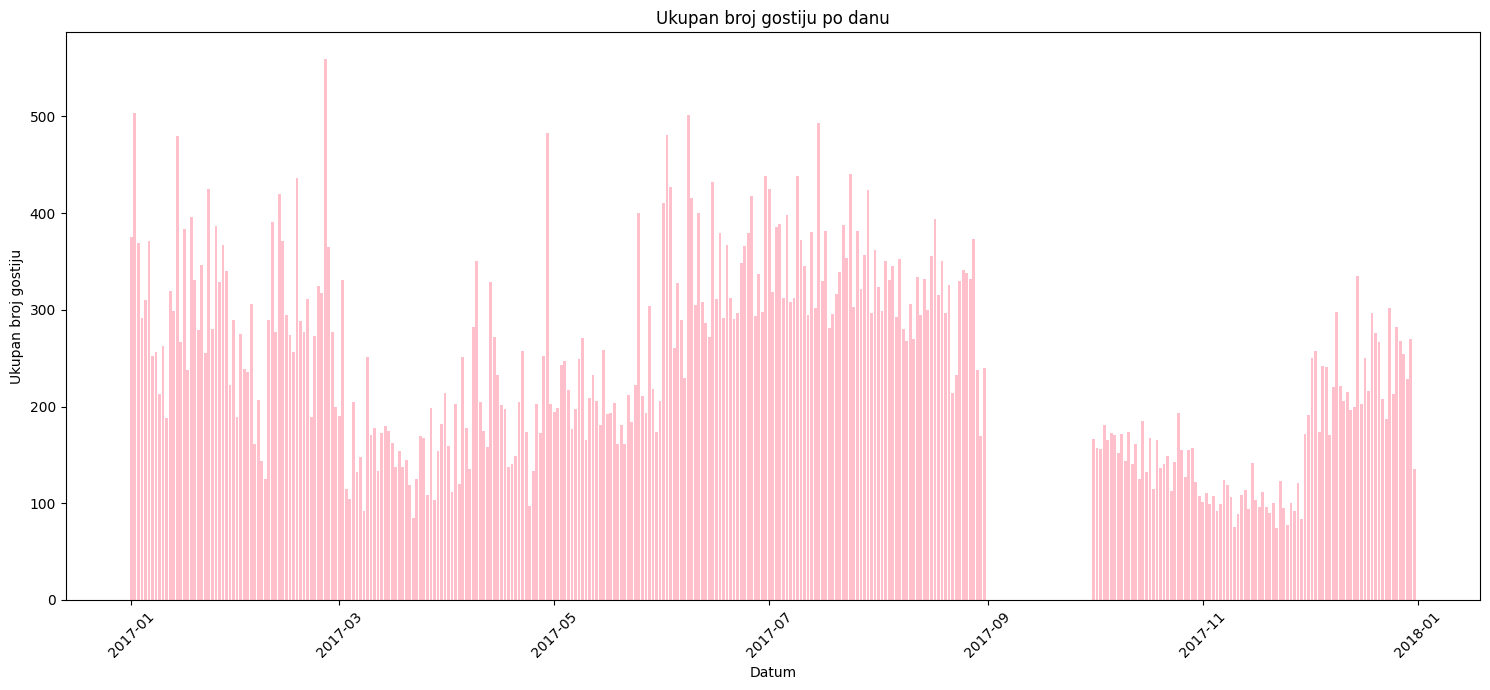

In [6]:
plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(dnevni_pregled['datum_dolaska'], dnevni_pregled['ukupan_broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju po danu')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

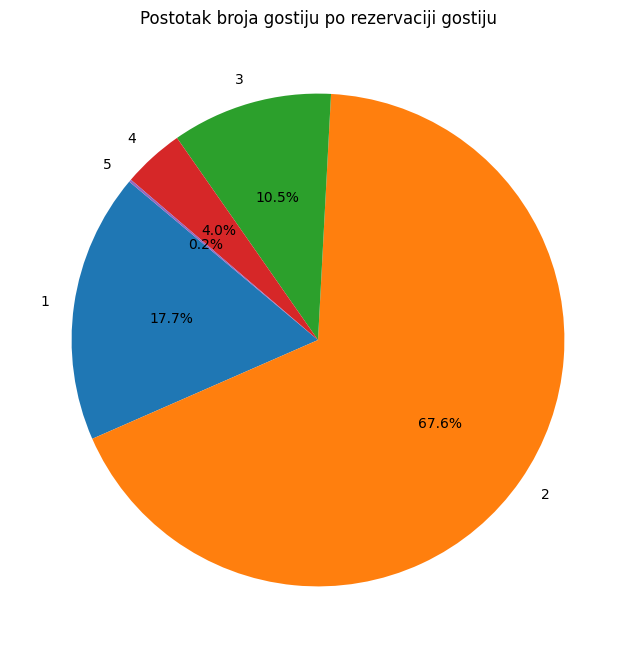

In [7]:
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = df['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju')
plt.show()

In [8]:
#racunanje broja ljudi u hotelu na dani natum (ne ukljucuje otkazane rezervacije)
occupancy = df[df['datum_otkazivanja_rezervacije'].isna()]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5761/1209691121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5761/1209691121.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])


,datum,broj_gostiju
0,2017-01-01,224
1,2017-01-02,471
2,2017-01-03,609
3,2017-01-04,673
4,2017-01-05,630


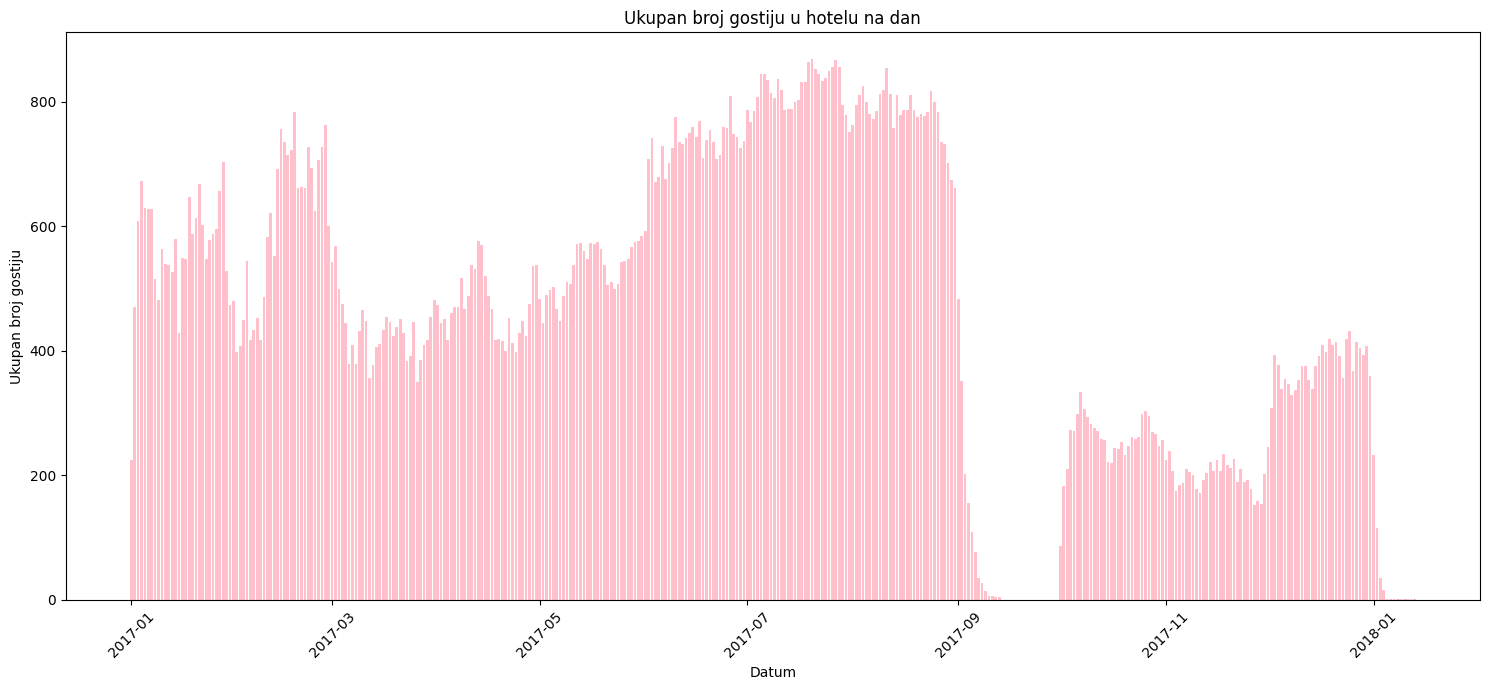

In [9]:
plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5761/3828035767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5761/3828035767.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])


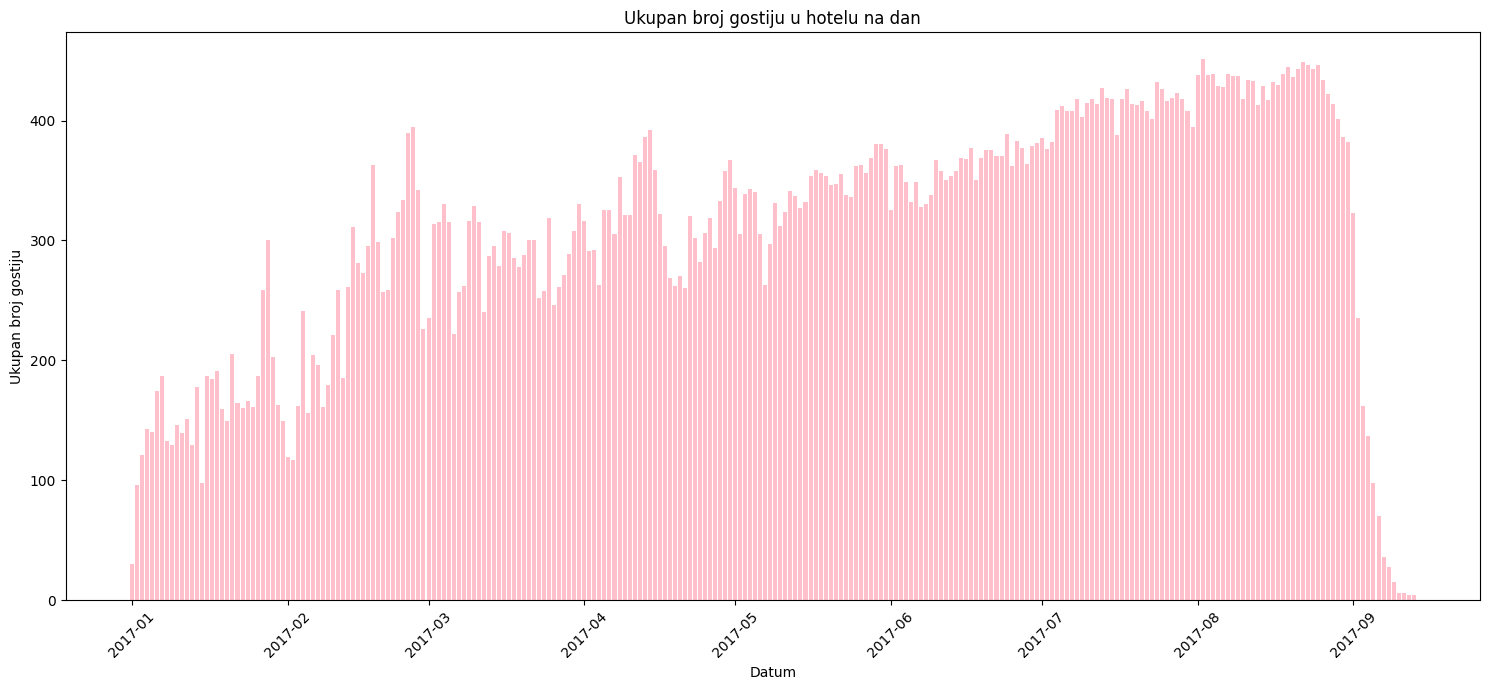

In [10]:
hotel0 = df[df['hotel_id']==0]
occupancy = hotel0[(hotel0['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5761/3446052201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
/var/folders/v_/qfv7yz9j391chxy7g2hsq7hc0000gn/T/ipykernel_5761/3446052201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])


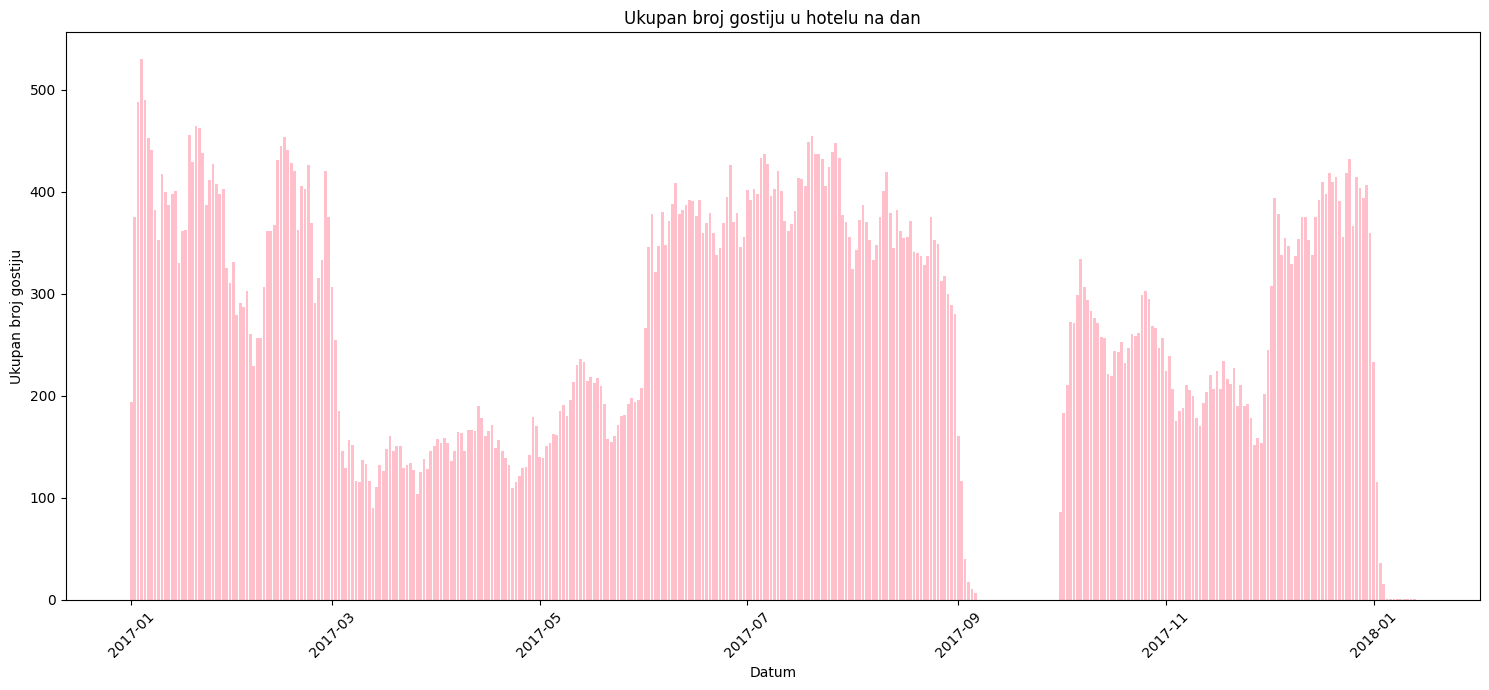

In [11]:
hotel1 = df[df['hotel_id']==1]
occupancy = hotel1[(hotel1['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

plt.figure(figsize=(15, 7))  # Prilagodite veličinu prema potrebi
plt.bar(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

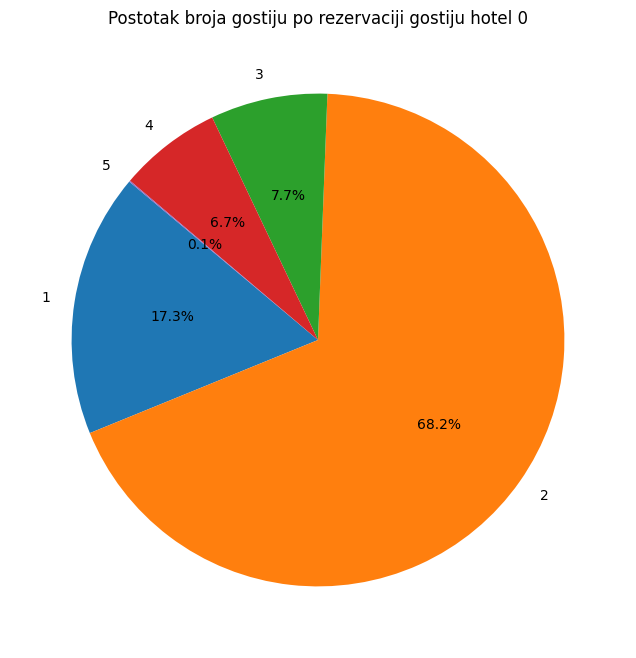

In [12]:
hotel0 = df[df['hotel_id']==0]
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = hotel0['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju hotel 0')
plt.show()

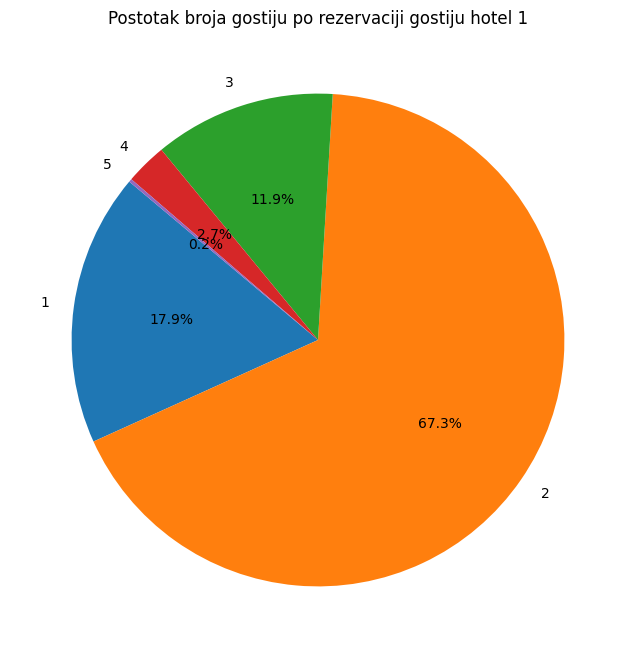

In [13]:
hotel1 = df[df['hotel_id']==1]
# Izračunavanje frekvencija za broj ljudi po rezervaciji 
frekvencija_po_broju_gostiju = hotel1['ukupan_broj_gostiju'].value_counts().sort_index()

# Kreiranje torta dijagrama za broj gostiju po rezervaciji
plt.figure(figsize=(10, 8))
plt.pie(frekvencija_po_broju_gostiju, labels=frekvencija_po_broju_gostiju.index, autopct='%1.1f%%', startangle=140)
plt.title('Postotak broja gostiju po rezervaciji gostiju hotel 1')
plt.show()